***Demo Prepared by Prof Monali Mavani***

This notebook explains ridge vs lasso vs no regularization on polynomial regression

 **Synthetic dataset** is used for demonstration

 Dataset is generated with follwing equation

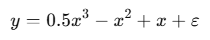

x∈[−3,3], evenly spaced (100 points)

ε∼N(0,1) is Gaussian noise with mean 0 and standard deviation 1

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# -----------------------------
# Generate synthetic nonlinear data
# -----------------------------
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5 * X[:, 0]**3 - X[:, 0]**2 + X[:, 0] + np.random.normal(0, 1, X.shape[0])
X_df = pd.DataFrame(X, columns=['X'])
y_df = pd.DataFrame(y, columns=['y'])
df = pd.concat([X_df, y_df], axis=1)
df.head()

,X,y
0,-3.000000,-25.003286
1,-2.939394,-24.415931
2,-2.878788,-22.447381
3,-2.818182,-20.428510
4,-2.757576,-21.080565


In [3]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=42)

In [17]:
# -----------------------------
# Define models for comparison
# -----------------------------
degree = 20
alpha = 1.0  # Regularization strength
models = {
    "Polynomial (No Reg)": LinearRegression(),
    "Ridge (L2)": Ridge(alpha=alpha),
    "Lasso (L1)": Lasso(alpha=alpha, max_iter=10000),
    "ElasticNet (L1+L2)": ElasticNet(alpha=alpha, l1_ratio=0.5, max_iter=10000)

}

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.519e+02, tolerance: 3.796e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.

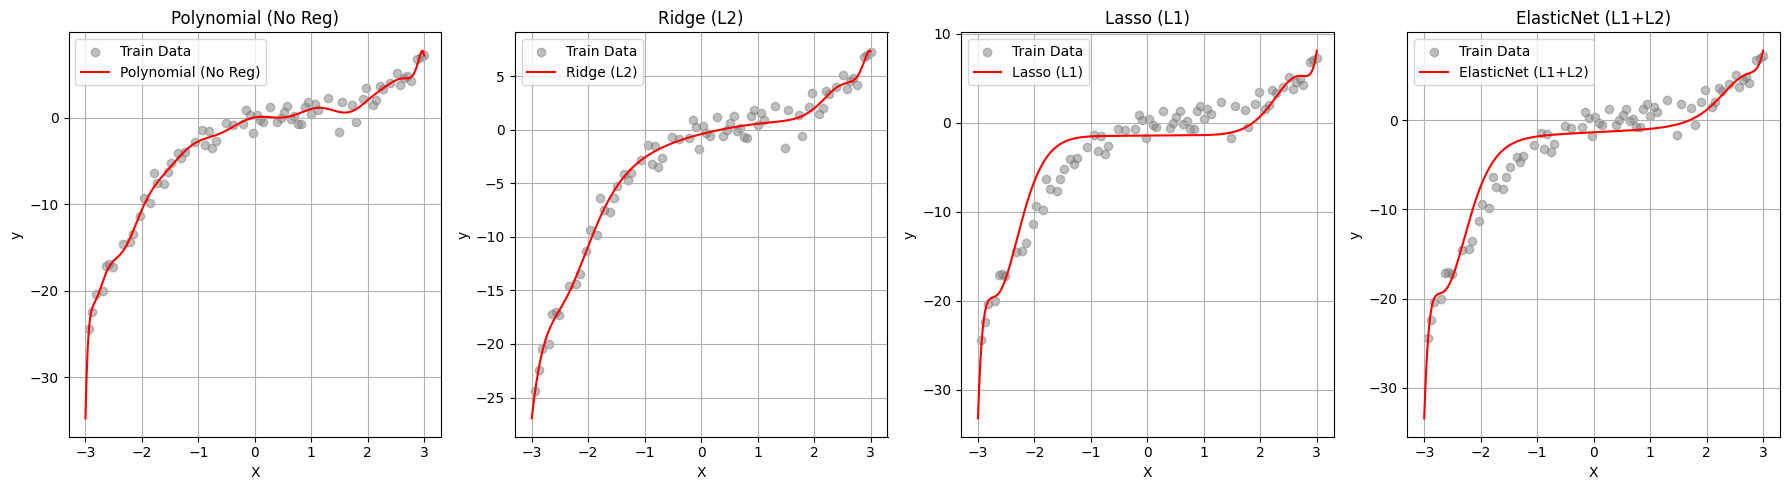

In [18]:
results = []
plt.figure(figsize=(18, 5))


for i, (name, base_model) in enumerate(models.items(), 1):
    # Create pipeline
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=degree)),
        ('reg', base_model)
    ])
    model.fit(X_train, y_train)

    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    results.append({
        "Model": name,
        "Train RMSE": round(train_rmse, 4),
        "Test RMSE": round(test_rmse, 4),
        "Train R²": round(train_r2, 4),
        "Test R²": round(test_r2, 4)
    })

    # Plot predictions
    X_plot = np.linspace(-3, 3, 300).reshape(-1, 1)
    y_plot = model.predict(X_plot)


    plt.subplot(1, 4, i)
    plt.scatter(X_train, y_train, color='gray', alpha=0.5, label="Train Data")
    plt.plot(X_plot, y_plot, color='red', label=name)
    plt.title(name)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

In [19]:
# -----------------------------
# Display results
# -----------------------------
results_df = pd.DataFrame(results)
print("\nModel Comparison (Degree 20):")
print(results_df.to_string(index=False))



Model Comparison (Degree 20):
              Model  Train RMSE  Test RMSE  Train R²  Test R²
Polynomial (No Reg)      0.8317     2.0033    0.9872   0.9297
         Ridge (L2)      0.8707     0.9298    0.9860   0.9848
         Lasso (L1)      2.1388     2.5489    0.9156   0.8861
 ElasticNet (L1+L2)      1.7998     2.2945    0.9403   0.9077


| Model                   | Train RMSE | Test RMSE | Train R² | Test R² | Interpretation                                                                                          |
| ----------------------- | ---------- | --------- | -------- | ------- | ------------------------------------------------------------------------------------------------------- |
| **Linear Regression**   | 3.2837     | 3.6688    | 0.8012   | 0.7641  | **Underfitting**: too simple (degree = 1), can't capture complex patterns                               |
| **Polynomial (No Reg)** | 0.8317     | 2.0033    | 0.9872   | 0.9297  | Severe **overfitting**: fits training set very well, fails to generalize                                |
| **Ridge (L2)**          | 0.8707     | 0.9298    | 0.9860   | 0.9848  | **Best generalization**: L2 regularization smooths the model, reducing variance effectively             |
| **Lasso (L1)**          | 2.1388     | 2.5489    | 0.9156   | 0.8861  | Likely **underfitting**: L1 penalization removes too many terms, oversimplifying the complex function   |
| **ElasticNet (L1+L2)**  | 1.7998     | 2.2945    | 0.9403   | 0.9077  | **Moderate fit**: a trade-off between Ridge and Lasso, partially effective but not optimal in this case |
